<a href="https://www.kaggle.com/code/nirmit27/credit-card-fraud-detection?scriptVersionId=168442406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import precision_score, recall_score, make_scorer

# Kaggle config.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


### Importing the dataset
- Only the first `80,000` rows

In [2]:
file_path = '/kaggle/input/creditcardfraud/creditcard.csv'
df = pd.read_csv(file_path)[:80000]

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocessing

### Features
- Extracting the **features** into `X` and **classes** into `y`

In [3]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values

X

array([[-1.35980713, -0.07278117,  2.53634674, ..., -0.18911484,
         0.13355838, -0.02105305],
       [ 1.19185711,  0.26615071,  0.16648011, ...,  0.12589453,
        -0.0089831 ,  0.01472417],
       [-1.35835406, -1.34016307,  1.77320934, ..., -0.13909657,
        -0.05535279, -0.05975184],
       ...,
       [-2.28727012,  1.12156794,  1.16358497, ..., -0.2520452 ,
        -0.40904438, -0.25311435],
       [-1.3509413 ,  0.23341085,  0.95082419, ..., -0.27339173,
         0.35042154,  0.14085102],
       [-2.00700424,  0.73613717,  0.05184662, ..., -0.96230381,
        -0.95055099, -0.59174836]])

### Target labels
- `1` denotes the **fraud** cases
- `0` denotes the **genuine** cases

In [4]:
print(f"Actual number of Fraud cases : {y.sum()}\nTotal Cases : {X.shape[0]}")

Actual number of Fraud cases : 196
Total Cases : 80000


## Modelling

### Logistic Regression
- Using `LogisticRegression` for **binary classification**

In [5]:
model = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)

pred1 = model.fit(X, y).predict(X).sum()

print(f"Predicted number of Fraud cases : {pred1}")

Predicted number of Fraud cases : 171


#### Scoring
Here, we can see that the **default** scoring metric is `accuracy_score`

In [6]:
??model.score

### **Grid Search**
- Using `GridSearchCV` to determine the optimal **class weights**
- `4-fold` **Cross-Validation** is being used

In [7]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]},
    cv=4,
    n_jobs=-1)

grid

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

#### Training the `grid`

In [8]:
grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

#### Results of the `cross-validation`
- Finding out the optimal **class weights**

In [9]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.sort_values(by='mean_test_score', ascending=False).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.439286,0.339639,0.006315,0.000151,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.9978,0.997413,0.00203,1


## Metrics

### Precision and Recall
- Using different scoring metrics

In [10]:
p_score = precision_score(y, grid.predict(X))
r_score = recall_score(y, grid.predict(X))

print(f"Precision Score : {p_score}\nRecall Score    : {r_score}")

Precision Score : 0.7682119205298014
Recall Score    : 0.5918367346938775


#### Adding `precision` and `recall` to the **Grid Search**
- Optimizing over the `precision` score

In [11]:
grid_pr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={"precision": make_scorer(precision_score), "recall_score": make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv=10,
    n_jobs=-1)

grid_pr

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

#### Training the `grid_pr`

In [12]:
grid_pr.fit(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

#### Results of the `cross-validation`
- Finding out the optimal **class weights** based on `precision` score

In [13]:
cv_results_pr = pd.DataFrame(grid_pr.cv_results_)

cv_results_pr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score
0,1.639549,0.190552,0.014777,0.001340,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.0,0.463415,0.583333,1.0,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,1.562574,0.176088,0.014350,0.001091,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.0,0.463415,0.583333,1.0,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,1.507916,0.144623,0.014346,0.000496,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.0,0.463415,0.583333,1.0,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,1.375287,0.178495,0.014517,0.000852,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.0,0.452381,0.583333,1.0,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.164756,0.149602,0.014010,0.000430,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.0,0.452381,0.583333,1.0,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959


#### **Best** mean `precision_score`

In [14]:
cv_results_pr.sort_values(by='mean_test_precision', ascending=False).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score
2,1.507916,0.144623,0.014346,0.000496,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.0,0.463415,0.583333,1.0,...,0.740113,0.683616,0.710227,0.698864,0.6875,0.715909,0.744318,0.727273,0.724454,0.043881


### Plotting the performance metrics
- We observe the **difference** in performance of the model on *training* vs. on the *testing* data
- The **intersection** b/w `Recall` and `Precision` occurs much **earlier** in **training** data

#### `Test` data

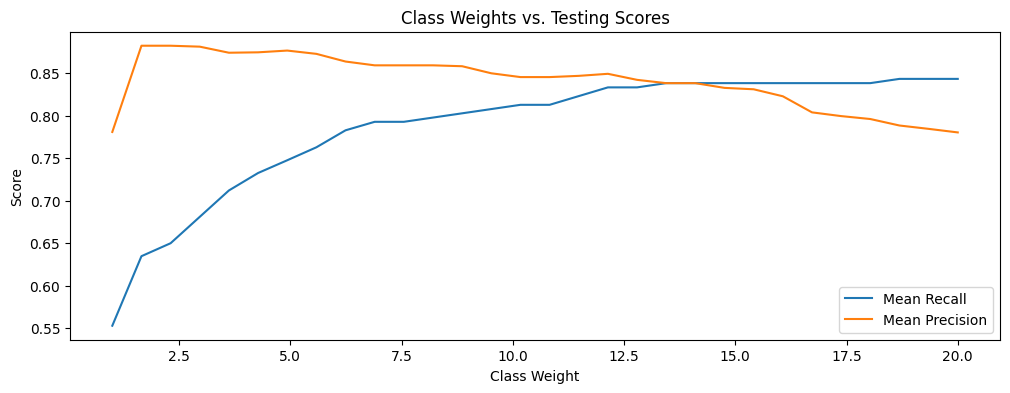

In [15]:
plt.figure(figsize=(12, 4))

for score in ['mean_test_recall_score', 'mean_test_precision']:
    plt.plot([_[1] for _ in cv_results_pr['param_class_weight']], cv_results_pr[score], label=score)

plt.title("Class Weights vs. Testing Scores")
plt.xlabel("Class Weight")
plt.ylabel("Score")

plt.legend(["Mean Recall", "Mean Precision"])

plt.show()

#### `Train` data

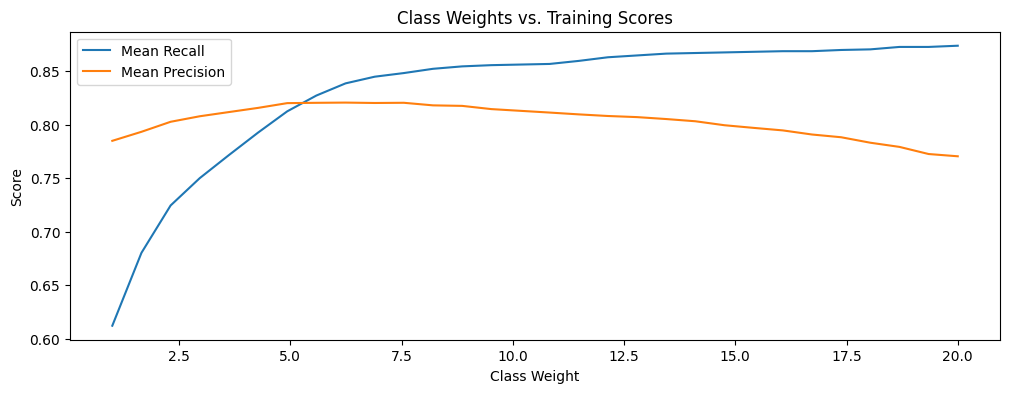

In [16]:
plt.figure(figsize=(12, 4))

for score in ['mean_train_recall_score', 'mean_train_precision']:
    plt.plot([_[1] for _ in cv_results_pr['param_class_weight']], cv_results_pr[score], label=score)

plt.title("Class Weights vs. Training Scores")
plt.xlabel("Class Weight")
plt.ylabel("Score")

plt.legend(["Mean Recall", "Mean Precision"])

plt.show()

### New performance metric
- We will create a new metric that optimizes on the `min()` of **precision** and **recall** scores

In [17]:
def min_precision_recall(y_true, y_pred):
    p_score = precision_score(y_true, y_pred)
    r_score = recall_score(y_true, y_pred)
    
    return min(p_score, r_score)

### Creating and training the new **Grid**
- This makes use of the **new** metric

In [18]:
grid_pr2 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={"precision": make_scorer(precision_score), 
             "recall_score": make_scorer(recall_score),
             "min_recall_precision": make_scorer(min_precision_recall)},
    refit='min_recall_precision',
    return_train_score=True,
    cv=10,
    n_jobs=-1)

grid_pr2

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_recall_precision', return_train_score=True,
             scoring={'min_recall_precision': make_scorer(min_precision_recall),
                      'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [19]:
grid_pr2.fit(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_recall_precision', return_train_score=True,
             scoring={'min_recall_precision': make_scorer(min_precision_recall),
                      'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

#### Results of the `cross-validation`

In [20]:
cv_results_pr2 = pd.DataFrame(grid_pr2.cv_results_)

cv_results_pr2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_recall_precision,split3_train_min_recall_precision,split4_train_min_recall_precision,split5_train_min_recall_precision,split6_train_min_recall_precision,split7_train_min_recall_precision,split8_train_min_recall_precision,split9_train_min_recall_precision,mean_train_min_recall_precision,std_train_min_recall_precision
0,1.443444,0.152963,0.027051,0.002113,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.0,0.463415,0.583333,1.0,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,1.396425,0.176314,0.025868,0.000991,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.0,0.463415,0.583333,1.0,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,1.438511,0.212241,0.031099,0.008942,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.0,0.463415,0.583333,1.0,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,1.508526,0.172180,0.024759,0.000861,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.0,0.452381,0.583333,1.0,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.204543,0.130285,0.026685,0.002368,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.0,0.452381,0.583333,1.0,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959


#### **Best** of the new `score`

In [21]:
cv_results_pr2.sort_values(by='mean_test_min_recall_precision', ascending=False).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_recall_precision,split3_train_min_recall_precision,split4_train_min_recall_precision,split5_train_min_recall_precision,split6_train_min_recall_precision,split7_train_min_recall_precision,split8_train_min_recall_precision,split9_train_min_recall_precision,mean_train_min_recall_precision,std_train_min_recall_precision
17,1.323491,0.133033,0.029253,0.007481,"{0: 1, 1: 12.137931034482758}","{'class_weight': {0: 1, 1: 12.137931034482758}}",0.857143,0.431818,0.576923,0.947368,...,0.828877,0.794737,0.801047,0.802139,0.787234,0.796875,0.794872,0.795812,0.807484,0.023328


### Plotting the performance metrics

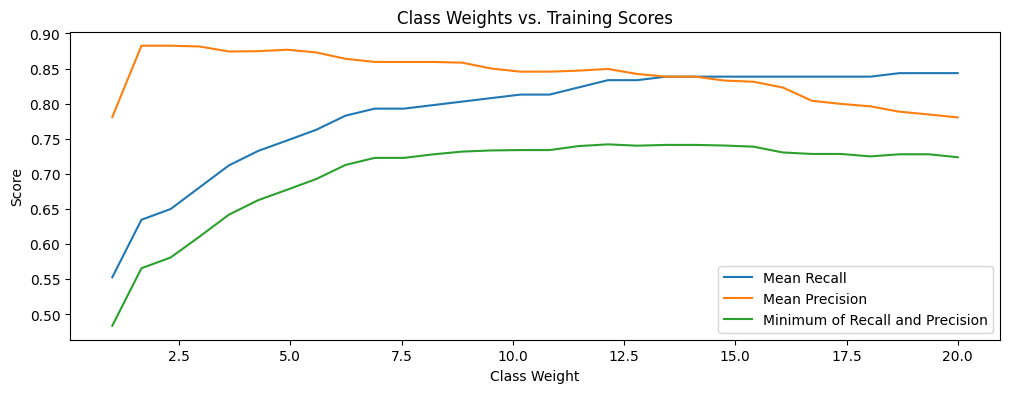

In [22]:
plt.figure(figsize=(12, 4))

for score in ['mean_test_recall_score', 'mean_test_precision', 'mean_test_min_recall_precision']:
    plt.plot([_[1] for _ in cv_results_pr2['param_class_weight']], cv_results_pr2[score], label=score)

plt.title("Class Weights vs. Training Scores")
plt.xlabel("Class Weight")
plt.ylabel("Score")

plt.legend(["Mean Recall", "Mean Precision", "Minimum of Recall and Precision"])

plt.show()